In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime

#Import data from John Hopkins CSSE 
df = pd.read_csv('time_series_covid19_confirmed_US.csv')

df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,121,128,130,133,133,133,133,135,135,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,11,13,13,13
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,620,683,725,788,897,903,923,974,1043,1068
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,45,50,51,51,51,51,51,51,51


In [2]:
df.drop(['Country_Region','Lat','Long_'], axis=1,inplace=True)
df1 = df.iloc[:,6:]

#make list of states
states = df1['Province_State']
states.drop_duplicates(inplace=True)

#50 states + 8 territories 
    #1) Diamond Princess
    #2) Grand Princess
    #3) D.C.
    #4) Samoa
    #5) Guam
    #6) Puerto Rico
    #7) Virgin Islands
    #8) North Marina Islands

In [3]:
#function to form state_df
def state_func(state):
    state_len = len(state)
    dc1 = df1.loc[df['Province_State'] == state]

    dc1.drop(['Province_State'], axis=1,inplace=True)
    dc1 = dc1.T

    new_header = dc1.iloc[0] #grab the first row for the header
    dc = dc1[1:] #take the data less the header row
    dc.columns = new_header

    dc.columns = pd.Index(map(lambda x : str(x)[:-(state_len+6)], dc.columns))
    dc.columns.name = 'Date'

    sum = dc.sum(axis=1)
    dc[state] = sum
    
    return dc

In [4]:
#function to plot/compare states
def fig(state1,state2='',state3=''):
    plt.figure(figsize=(15,10))
    #-------
    df1 = state_func(state1)
   
    plt.plot_date(df1.index,df1[state1],ls='-',label=state1)
    if state2!='': 
        df2 = state_func(state2)
        plt.plot_date(df2.index,df2[state2],ls='-',label=state2)
        if state3!='':
            df3 = state_func(state3)
            plt.plot_date(df3.index,df3[state3],ls='-',label=state3)
    #-------
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Total Cases: '+str(state1))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

In [5]:
#plot daily cases
def plot_diff(state):
    #---------------------------------
    diff_st = state_func(state).diff()

    plt.figure(figsize=(15,10))

    #diff
    plt.bar(diff_st.index,diff_st[state],ls='-',label=state,color='indianred')
       
    ax=plt.gca()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

    plt.title('Daily Cases: '+str(state))
    plt.ylabel('Positive Cases')
    plt.xlabel('Date')

    plt.legend() 
    plt.xticks(rotation='vertical')

In [6]:
#loop over states
#run state_fun
dc = state_func('New York')
dates = dc.index

dc_tot = pd.DataFrame(dates)
#dc_tot = dc_tot.reset_index()
dc_tot.rename(columns={ dc_tot.columns[0]: "Date" }, inplace = True)
dc_tot

df_test = df
states = df_test.loc[:,'Province_State']
states = states.drop_duplicates()

for col in states:
    #print(col)
    dtest = state_func(col)
    sf = dtest.reset_index()
    dc_tot=pd.concat( [dc_tot, sf[col]],axis=1)

    #pos_state = state_func('New York')
#pos_state[state]
dc_tot = dc_tot.set_index('Date')

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


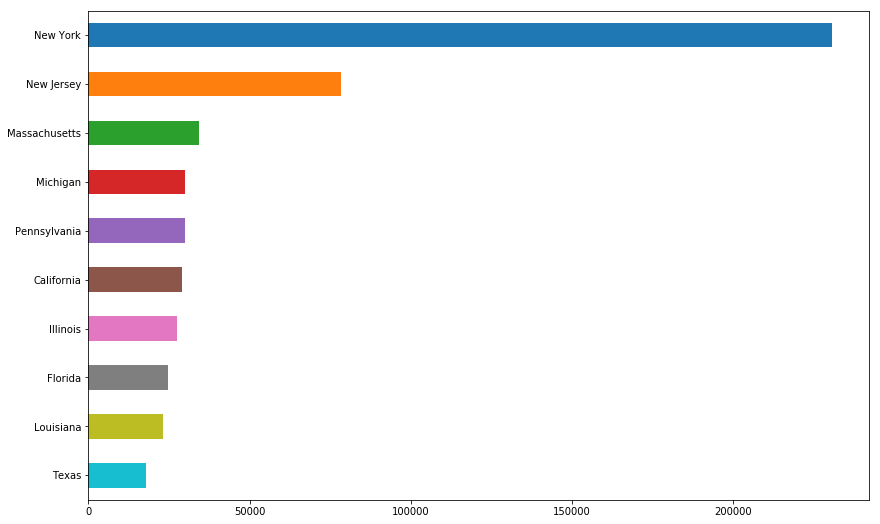

In [7]:
plt.figure(figsize=(14,9))
#.plot.bar()

df_top=dc_tot.T
today = len(df_top.columns)-1
df_top = df_top.sort_values(df_top.columns[today], ascending = False)
df_top = df_top.iloc[0:10,:]

df_top = df_top['4/17/2020']

ax = df_top.plot(kind='barh')
ax.invert_yaxis()
plt.show()

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


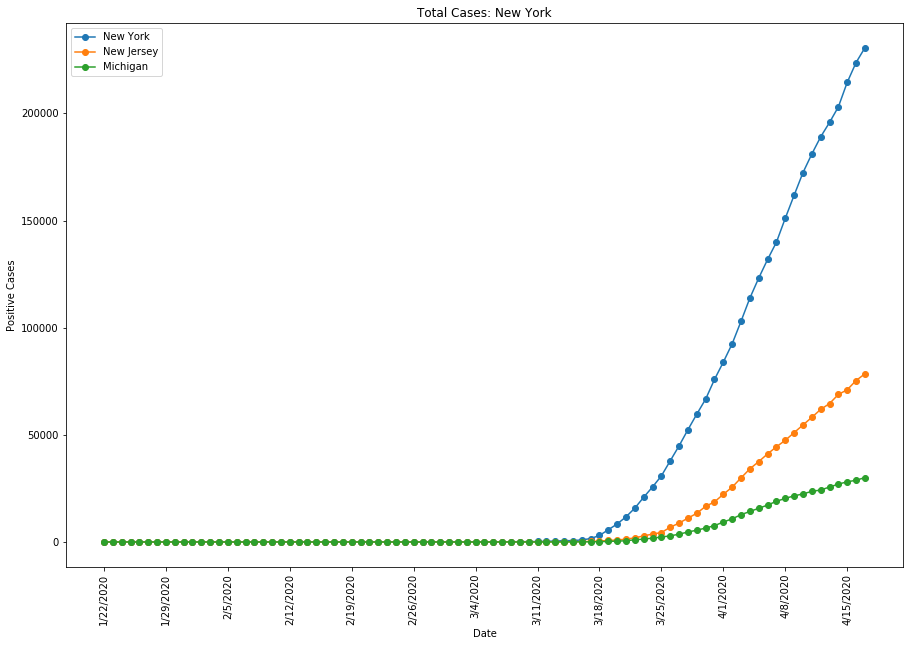

In [19]:
#TD: What are the top states? (A: NY, NJ, Mass, Michigan, California, Penn, Ill, Louis, Flo)
#Make seperate comparative function
fig('New York','New Jersey','Michigan')

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


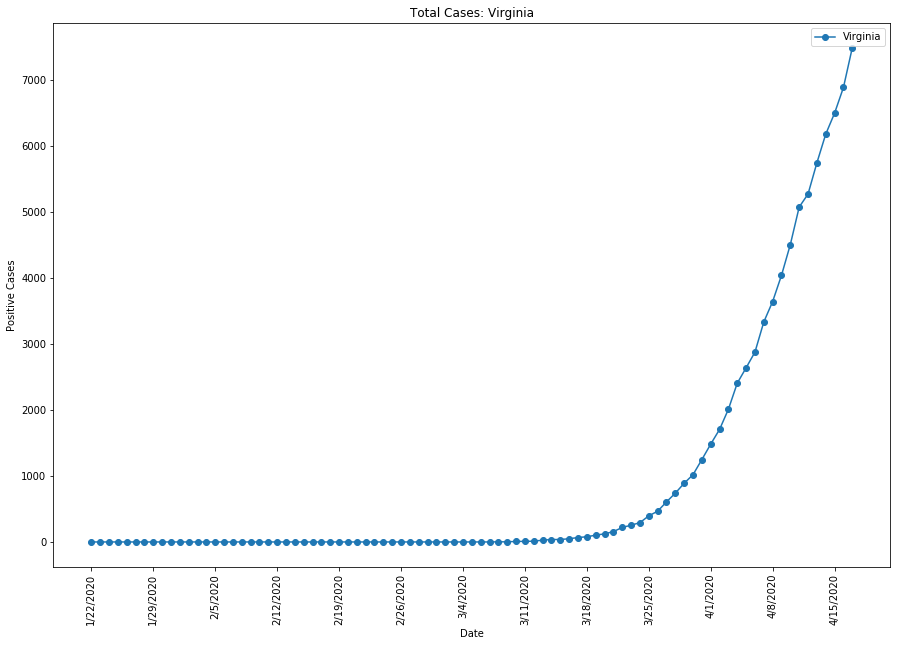

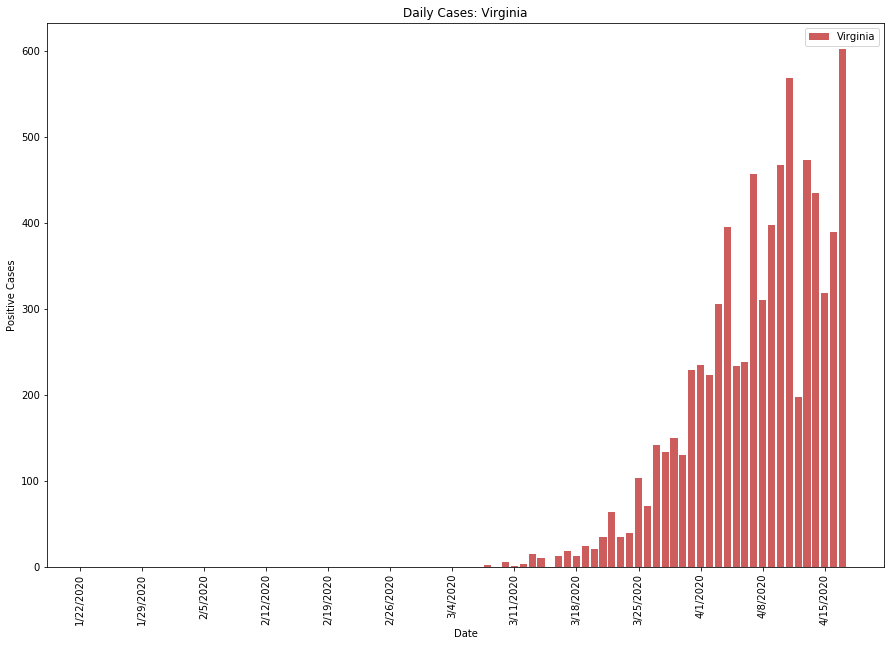

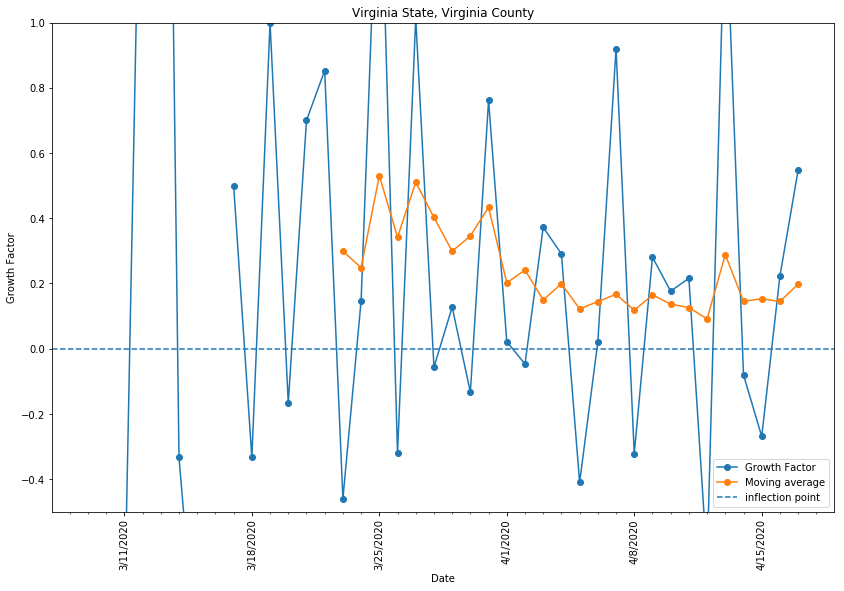

In [32]:
state = 'Virginia'

#----
state_func(state)
fig(state)
plot_diff(state)
#----
window = 7
state = state
county = state #Total for sum
diff_st = state_func(state).diff()

gf = diff_st.pct_change()
rol = gf.rolling(window).sum()/window

plt.figure(figsize=(14,9))

plt.plot_date(gf.index,gf[county].values,label='Growth Factor',ls='-')
plt.plot_date(rol.index,rol[county].values,label='Moving average',ls='-')


plt.xticks(rotation='vertical')
plt.title(str(state)+' State, '+str(county)+' County')
plt.ylabel('Growth Factor')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.axhline(0,ls='--',label='inflection point')
leg = plt.legend();
plt.ylim([-0.5, 1])

plt.show()

In [31]:
#top 10 conunties
state = 'New York'

df_state = state_func(state)

dft = df_state.T
dft
dft.iloc[0,:]
today = len(dft.columns)-1
df_top = dft.sort_values(dft.columns[today], ascending = False)
df_top.head(10) #Buffalo/Erie is 8th!
#upstate is bad as well

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,1/31/2020,...,4/8/2020,4/9/2020,4/10/2020,4/11/2020,4/12/2020,4/13/2020,4/14/2020,4/15/2020,4/16/2020,4/17/2020
Date,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,...,151061,161779,172348,181026,189033,195749,203020,214454,223691,230597
New York City,0,0,0,0,0,0,0,0,0,0,...,81803,87028,92384,98308,103208,106763,110465,118302,123146,127352
Nassau,0,0,0,0,0,0,0,0,0,0,...,18548,20140,21512,22584,23553,24358,25250,26715,27772,28539
Suffolk,0,0,0,0,0,0,0,0,0,0,...,17008,18803,20320,20321,20934,21643,22691,23523,24812,25035
Westchester,0,0,0,0,0,0,0,0,0,0,...,15887,17004,18077,18729,19313,19786,20191,20947,21828,22476
Rockland,0,0,0,0,0,0,0,0,0,0,...,6413,6665,7122,7477,7721,7965,8335,8474,8752,8987
Orange,0,0,0,0,0,0,0,0,0,0,...,4075,4309,4532,4847,5027,5598,5830,5830,6266,6514
Dutchess,0,0,0,0,0,0,0,0,0,0,...,1395,1493,1598,1744,1838,1881,1934,2048,2085,2142
Erie,0,0,0,0,0,0,0,0,0,0,...,1335,1432,1498,1506,1571,1661,1730,1812,1951,2023
